In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Data Set.csv', usecols=lambda x: not x.startswith('Unnamed'))
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,785,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2815,5,2021-09-15 02:45:31,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CustomerID    100000 non-null  int64 
 1   Age           100000 non-null  int64 
 2   Device        100000 non-null  object
 3   City          100000 non-null  object
 4   Product       100000 non-null  object
 5   Price         100000 non-null  int64 
 6   Quantity      100000 non-null  int64 
 7   PurchaseDate  100000 non-null  object
 8   BrowsingTime  100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


In [4]:
df.shape

(100000, 9)

In [5]:
df.size

900000

In [6]:
# Checking Duplicates

df[df.duplicated()]

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime


In [7]:
col= df.columns.to_list()
col

['CustomerID',
 'Age',
 'Device',
 'City',
 'Product',
 'Price',
 'Quantity',
 'PurchaseDate',
 'BrowsingTime']

In [8]:
# Unique Items

for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('*****')

CustomerID
[ 9597 11891 19067 ... 90528 84021 43568]

*****
Age
[42 26 61 24 60 50 67 49 43 56 70 27 21 31 69 48 54 45 35 38 36 39 53 22
 30 59 52 29 25 19 63 65 58 62 18 55 41 46 20 33 51 44 23 57 66 47 32 68
 37 40 28 64 34]

*****
Device
['Mobile' 'Tablet' 'Desktop']

*****
City
['Vadodara' 'Kolkata' 'Meerut' 'Faridabad' 'Lucknow' 'Varanasi' 'Hubli'
 'Jabalpur' 'Raipur' 'Kota' 'Bhopal' 'Bareilly' 'Pune' 'Jodhpur'
 'Chandigarh' 'Thane' 'Thiruvananthapuram' 'Ahmedabad' 'Amritsar'
 'Chennai' 'Tiruchirappalli' 'Allahabad' 'Vijayawada' 'Tiruppur' 'Patna'
 'Gwalior' 'Nagpur' 'Ranchi' 'Navi Mumbai' 'Mysore' 'Moradabad' 'Srinagar'
 'Kanpur' 'Surat' 'Hyderabad' 'Guwahati' 'Agra' 'Mumbai' 'Delhi'
 'Bangalore' 'Ludhiana' 'Dhanbad' 'Indore' 'Aurangabad' 'Rajkot' 'Howrah'
 'Solapur' 'Jaipur' 'Nashik']

*****
Product
['Smart Thermostat' 'Camera' 'Microphone' 'Action Camera' 'Headphones'
 'Wireless Keyboard' 'Gaming Headset' 'Voice Assistant' 'Security Camera'
 'Gaming Console' 'Printer' 'Mouse' '

In [9]:
# Checking null

(df.isnull().sum().sum() / (df.size)) * 100

0.0

In [10]:
df.isnull().sum()

CustomerID      0
Age             0
Device          0
City            0
Product         0
Price           0
Quantity        0
PurchaseDate    0
BrowsingTime    0
dtype: int64

In [11]:
# Making numerical columns to a list
num = df.select_dtypes(include=np.number).columns.to_list()

In [12]:
for i in num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    Outliers = (df[i] < LW) |(df[i] > UW)
    Filtered_Data = df[~Outliers]
    print(i)
    print("Number of outliers:", Outliers.sum())
    print("Filtered data size:", len(Filtered_Data))
    print(60*'*')

CustomerID
Number of outliers: 0
Filtered data size: 100000
************************************************************
Age
Number of outliers: 0
Filtered data size: 100000
************************************************************
Price
Number of outliers: 13617
Filtered data size: 86383
************************************************************
Quantity
Number of outliers: 0
Filtered data size: 100000
************************************************************
BrowsingTime
Number of outliers: 0
Filtered data size: 100000
************************************************************


In [13]:
# Creating new columns

df['TotalPurchase'] = df['Price'] * df['Quantity']
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['PurchaseMonth'] = df['PurchaseDate'].dt.month
df['PurchaseDayOfWeek'] = df['PurchaseDate'].dt.dayofweek

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         100000 non-null  int64         
 1   Age                100000 non-null  int64         
 2   Device             100000 non-null  object        
 3   City               100000 non-null  object        
 4   Product            100000 non-null  object        
 5   Price              100000 non-null  int64         
 6   Quantity           100000 non-null  int64         
 7   PurchaseDate       100000 non-null  datetime64[ns]
 8   BrowsingTime       100000 non-null  int64         
 9   TotalPurchase      100000 non-null  int64         
 10  PurchaseMonth      100000 non-null  int32         
 11  PurchaseDayOfWeek  100000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(6), object(3)
memory usage: 8.4+ MB


<Axes: xlabel='Age'>

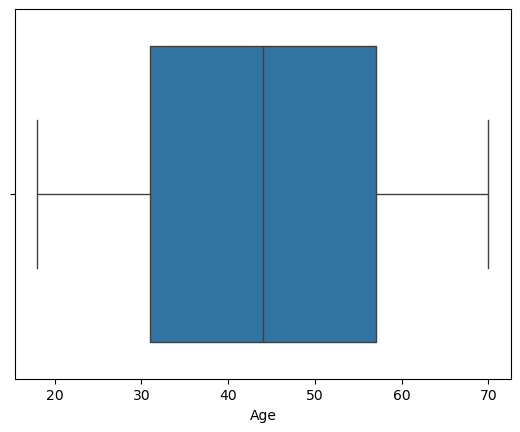

In [15]:
# Box PLot

sns.boxplot(x=df['Age'])

<Axes: xlabel='Device', ylabel='count'>

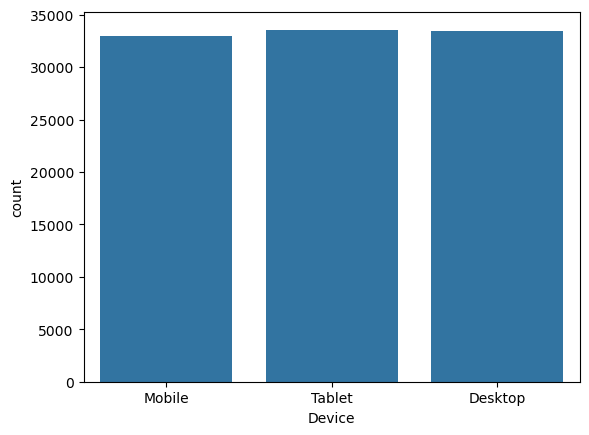

In [16]:
# Count plot

sns.countplot(x='Device', data=df)  

<Axes: xlabel='Product'>

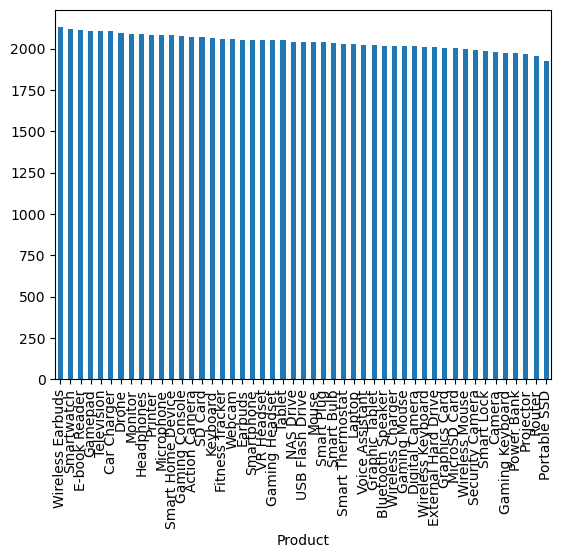

In [17]:
# Value counts

df['Product'].value_counts().plot(kind='bar') 

<Axes: xlabel='AgeGroup', ylabel='BrowsingTime'>

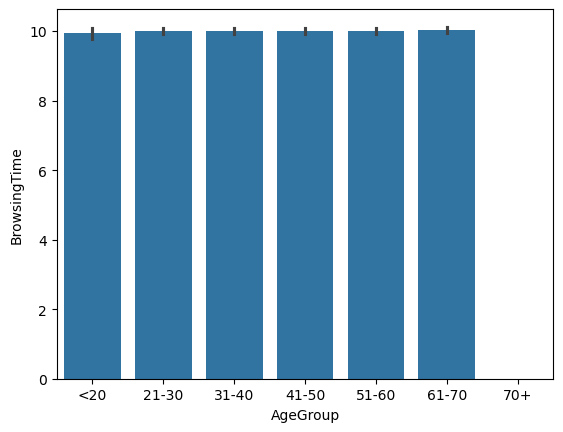

In [18]:
# Bar Plot

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                        labels=['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])
sns.barplot(x='AgeGroup', y='BrowsingTime', data=df, estimator='mean')


<Axes: xlabel='Device', ylabel='TotalPurchase'>

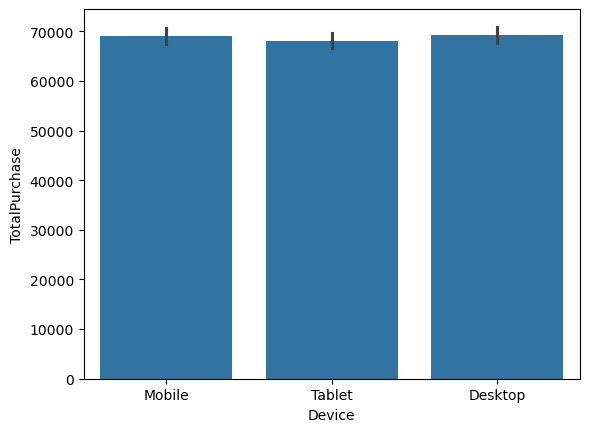

In [19]:
# Bar Plot

sns.barplot(x='Device', y='TotalPurchase', data=df)  

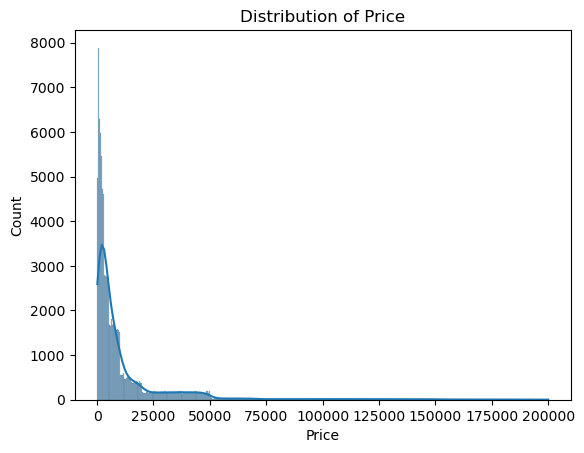

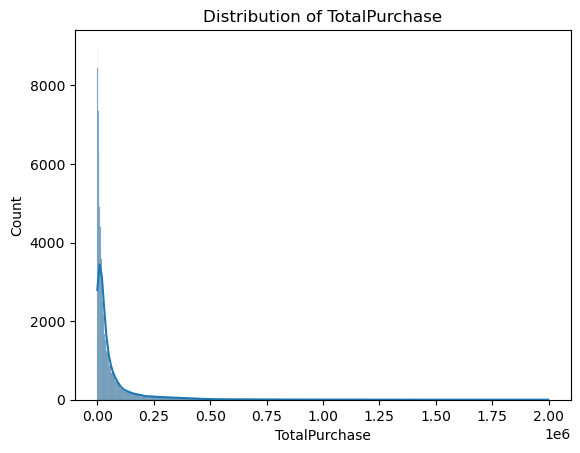

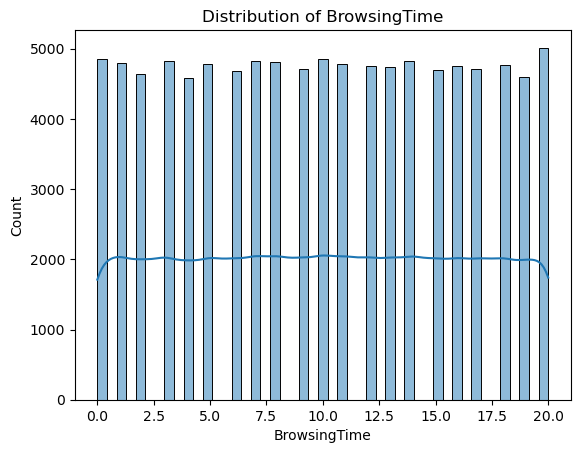

In [20]:
# Histplot

for col in ['Price', 'TotalPurchase', 'BrowsingTime']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [22]:
# Selecting features for clustering

selected_features = ['Age', 'Device', 'City', 'Product', 'BrowsingTime', 'TotalPurchase','PurchaseMonth']


In [23]:
# Making a copy

features = df[selected_features].copy()

In [24]:
# Dummy Encoding

device_encoded = pd.get_dummies(features['Device'], prefix='Device', drop_first=True).astype(int)
features = pd.concat([features, device_encoded], axis=1)
features.drop(columns=['Device'], inplace=True)

In [25]:
# Frequency Encoding

for col in ['City', 'Product']:
    freq = features[col].value_counts(normalize=True)
    features[col + '_freq'] = features[col].map(freq)
features.drop(columns=['City', 'Product'], inplace=True)

In [26]:
features

,Age,BrowsingTime,TotalPurchase,PurchaseMonth,Device_Mobile,Device_Tablet,City_freq,Product_freq
0,42,9,8882,8,1,0,0.02007,0.02030
1,26,1,211644,11,0,1,0.02007,0.01979
2,61,20,1570,12,0,0,0.02060,0.02084
3,24,8,88000,2,0,0,0.02029,0.02071
4,60,10,14075,9,0,0,0.02035,0.02084
...,...,...,...,...,...,...,...,...
99995,60,0,151856,11,1,0,0.01975,0.02077
99996,60,8,13070,7,0,1,0.01975,0.02084
99997,35,10,35720,7,1,0,0.02005,0.02019
99998,23,19,4048,2,1,0,0.02007,0.02053


In [37]:
df = df.drop(columns=['AgeGroup'])

In [27]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'BrowsingTime', 'TotalPurchase', 'PurchaseMonth']
features[num_cols] = scaler.fit_transform(features[num_cols])


Running KMeans for k = 1...
Running KMeans for k = 2...
Running KMeans for k = 3...
Running KMeans for k = 4...
Running KMeans for k = 5...
Running KMeans for k = 6...
Running KMeans for k = 7...
Running KMeans for k = 8...


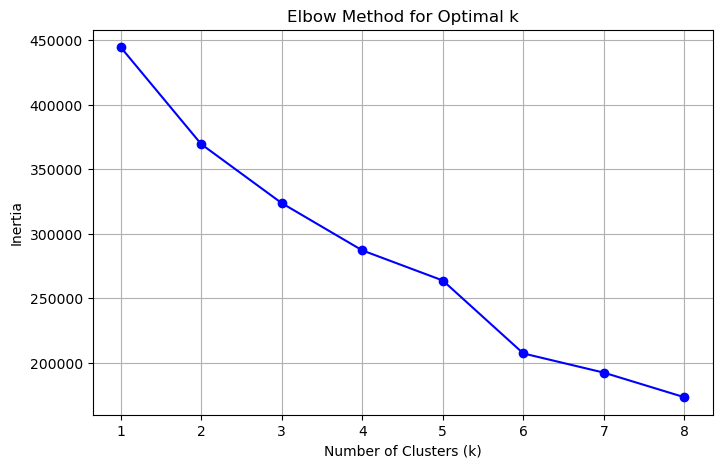

In [28]:
# Finding K using Elbow method

inertia = []
K = range(1, 9)

for k in K:
    print(f"Running KMeans for k = {k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features)  # features_encoded is your scaled & encoded data
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xticks(K)
plt.show()


In [29]:
# Finding K using silhouette method

n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in n_clusters:
    print(f"Fitting KMeans for k = {k}...")
    model = KMeans(n_clusters=k, random_state=10, n_init='auto')
    labels = model.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Fitting KMeans for k = 2...
Silhouette Score for k=2: 0.1825
Fitting KMeans for k = 3...
Silhouette Score for k=3: 0.1714
Fitting KMeans for k = 4...
Silhouette Score for k=4: 0.1846
Fitting KMeans for k = 5...
Silhouette Score for k=5: 0.1994
Fitting KMeans for k = 6...
Silhouette Score for k=6: 0.1949



✅ Best number of clusters based on silhouette score: 5


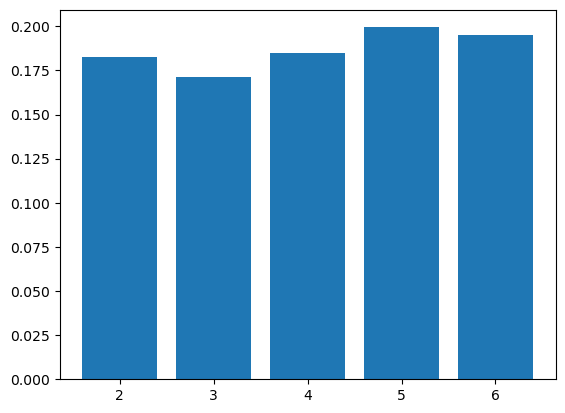

In [30]:
# Plotting K

plt.bar(range(2,7),silhouette_scores)

# Selecting best k
best_k = n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Best number of clusters based on silhouette score: {best_k}")

In [31]:
# K-means Clustering

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
print(df['Cluster'].value_counts())

Cluster
0    22403
2    21882
4    21097
1    17542
3    17076
Name: count, dtype: int64


In [32]:
# Basic profiling of each cluster
cluster_profile = df.groupby('Cluster')[['Age', 'BrowsingTime', 'TotalPurchase']].agg(['mean', 'median', 'count']).round(2)
print(cluster_profile)

           Age               BrowsingTime               TotalPurchase  \
          mean median  count         mean median  count          mean   
Cluster                                                                 
0        44.04   44.0  22403        15.73   16.0  22403      70293.00   
1        31.10   31.0  17542         5.31    5.0  17542      56341.81   
2        58.29   59.0  21882         4.50    4.0  21882      78020.24   
3        56.23   57.0  17076        14.80   15.0  17076      58466.61   
4        30.24   30.0  21097         9.67   10.0  21097      76433.75   

                         
          median  count  
Cluster                  
0        20980.0  22403  
1        19057.0  17542  
2        22348.5  21882  
3        19236.0  17076  
4        22023.0  21097  


In [33]:
# Distribution of Device, City, Product in each cluster
for col in ['Device', 'City', 'Product']:
    print(f"\n{col} distribution by cluster:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0).round(2))



Device distribution by cluster:
Device   Desktop  Mobile  Tablet
Cluster                         
0           0.34    0.32    0.34
1           0.33    0.33    0.34
2           0.34    0.33    0.33
3           0.33    0.33    0.34
4           0.33    0.34    0.33

City distribution by cluster:
City     Agra  Ahmedabad  Allahabad  Amritsar  Aurangabad  Bangalore  \
Cluster                                                                
0        0.02       0.02       0.02      0.02        0.02       0.02   
1        0.02       0.02       0.02      0.02        0.02       0.02   
2        0.02       0.02       0.02      0.02        0.02       0.02   
3        0.02       0.02       0.02      0.02        0.02       0.02   
4        0.02       0.02       0.02      0.02        0.02       0.02   

City     Bareilly  Bhopal  Chandigarh  Chennai  ...  Solapur  Srinagar  Surat  \
Cluster                                         ...                             
0            0.02    0.02        0.02 

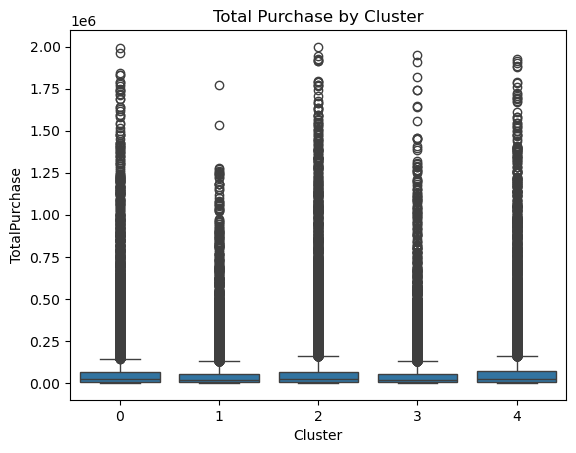

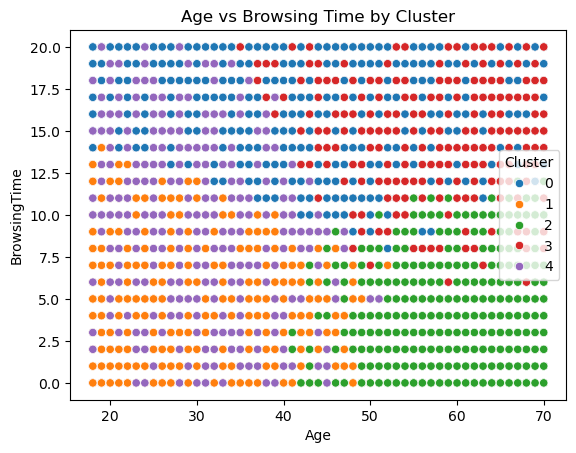

In [34]:
# TotalPurchase distribution by Cluster
sns.boxplot(data=df, x='Cluster', y='TotalPurchase')
plt.title('Total Purchase by Cluster')
plt.show()

# Age vs BrowsingTime by Cluster
sns.scatterplot(data=df, x='Age', y='BrowsingTime', hue='Cluster', palette='tab10')
plt.title('Age vs Browsing Time by Cluster')
plt.show()


In [35]:
# Summary of all numerical columns grouped by cluster
cluster_summary = df.groupby('Cluster')[['Age', 'BrowsingTime', 'TotalPurchase']].mean().round(2)
print(cluster_summary)


           Age  BrowsingTime  TotalPurchase
Cluster                                    
0        44.04         15.73       70293.00
1        31.10          5.31       56341.81
2        58.29          4.50       78020.24
3        56.23         14.80       58466.61
4        30.24          9.67       76433.75


****Insights****

Cluster 0: Middle-aged users who browse a lot and spend well. They are interested and can be targeted with regular offers.

Cluster 1: Young users with very low browsing and low spending. They need more engagement to become active buyers.

Cluster 2: Older customers who spend the most but browse very little. They prefer quick purchases and can be shown high-value items directly.

Cluster 3: Older users with good browsing and average spending. They are curious and may respond well to product bundles or offers.

Cluster 4: Young users who spend almost as much as older ones. They are strong buyers and can be targeted with new and trending products.

From the cluster analysis, we found that older customers (especially in Cluster 2) tend to spend more even though they don’t spend much time browsing. This means Mohakrt can improve their shopping experience by showing them quick and relevant product suggestions, such as Top Picks for the day or Quick Buys. On the other hand, younger users in Cluster 1 browse less and also spend the least. To attract this group, Mohakrt can introduce fun and engaging strategies like reward points,  discounts, or interactive features to increase their interest. And there is another young group (Cluster 4) that actually spends a lot. This shows that some younger customers are valuable, and Mohakrt can keep them engaged through exclusive product launches, early access sales, or trend-based collections.

In [39]:
# Creating the new csv file with cluster

df.to_csv("customer_segments.csv", index=False)
